In [ ]:
# upload dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img

In [ ]:
# get list data
filenames = os.listdir('/content/drive/My Drive/Cnn_datasets/Natural_images_2/new_images/natural_images/')

In [ ]:
# group based on category
category = []
for name in filenames:
  item = name.split('_')[0]
  if item == 'airplane':
    category.append(0)
  elif item == 'cat':
    category.append(1)
  elif item == 'car':
    category.append(2)
  elif item == 'dog':
    category.append(3)
  elif item == 'flower':
    category.append(4)
  elif item == 'fruit':
    category.append(5)
  elif item == 'motorbike':
    category.append(6)
  elif item =='person':
    category.append(7)

category

[6,
 6,
 5,
 5,
 6,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 7,
 5,
 5,
 5,
 6,
 5,
 6,
 7,
 5,
 7,
 6,
 5,
 6,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 5,
 7,
 6,
 5,
 5,
 6,
 6,
 6,
 7,
 5,
 6,
 5,
 5,
 7,
 7,
 6,
 6,
 7,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 6,
 6,
 7,
 6,
 5,
 6,
 5,
 6,
 5,
 5,
 6,
 7,
 7,
 6,
 6,
 5,
 6,
 7,
 7,
 5,
 6,
 6,
 5,
 6,
 7,
 5,
 6,
 5,
 5,
 6,
 7,
 5,
 7,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 7,
 5,
 6,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 5,
 5,
 7,
 5,
 5,
 5,
 6,
 6,
 7,
 6,
 6,
 5,
 7,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 7,
 5,
 5,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 7,
 5,
 6,
 5,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 6,
 6,
 5,
 7,
 6,
 5,
 7,
 7,
 5,
 7,
 5,
 6,
 6,
 7,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 6,
 6,
 5,
 6,
 5,
 6,
 5,
 6,
 5,
 7,
 7,
 5,
 6,
 7,
 6,
 6,
 6,
 7,
 5,
 7,
 6,
 6,
 5,
 5,
 6,
 5,
 5,
 7,
 6,
 7,
 6,
 7,
 6,
 5,
 6,
 6,
 5,
 6,
 6,


In [ ]:
# unique check
listset = set(category)
listset

{0, 1, 2, 3, 4, 5, 6, 7}

In [ ]:
# create dataframe
df = pd.DataFrame({
    'filename':filenames,
    'categories': category
})
# shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)
df.head(5)

,filename,categories
0,flower_0313.jpg,4
1,cat_0699.jpg,1
2,motorbike_0215.jpg,6
3,fruit_0978.jpg,5
4,fruit_0236.jpg,5


5    1000
7     993
2     968
1     906
4     843
6     804
0     727
3     723
Name: categories, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='categories', ylabel='count'>

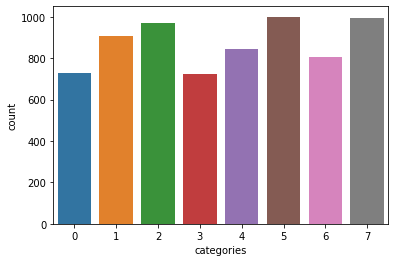

In [ ]:
# total category count
print(df['categories'].value_counts())
# category distribution
sns.countplot(df['categories'])

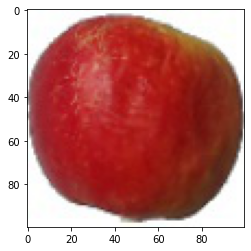

In [ ]:
# load random image
import random
img_sample = random.choice(df['filename'])
# load image
img = load_img('/content/drive/My Drive/Cnn_datasets/Natural_images_2/new_images/natural_images/'+img_sample)
plt.imshow(img)

In [ ]:
# building cnn model
import keras
import tensorflow as tf
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from keras.optimizers import RMSprop


model = tf.keras.Sequential()
# adding layers
model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same', strides=(1,1),activation='relu', input_shape=(128, 128, 3)))
# maxpooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# dropout regularization
model.add(Dropout(.25))

# second convolutional layer
model.add(Conv2D(filters = 64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

# flatten model
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))

# output layer
model.add(Dense(units=8, activation='softmax'))

# model optimizer
optimize = RMSprop(learning_rate = 0.0001)

# copile model
model.compile(optimizer=optimize, loss='categorical_crossentropy', metrics=['accuracy'])

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 254016)            0

## Regularization and Data splits

In [ ]:
# learning rate Regularization
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=.2,
    patience= 3,
    verbose=1,
    min_lr=0.00001
)

earlystop = EarlyStopping(monitor='val_loss',patience=8)

callback = [earlystop, learning_rate_reduction]

In [ ]:
# change target back to words

word_map = {
    0:'airplane',
    1:'cat',
    2:'car',
    3:'dog',
    4:'flower',
    5:'fruit',
    6:'motorbike',
    7:'person'
}
df['categories'] =df['categories'].map(word_map)
df.head(5)



,filename,categories
0,flower_0313.jpg,flower
1,cat_0699.jpg,cat
2,motorbike_0215.jpg,motorbike
3,fruit_0978.jpg,fruit
4,fruit_0236.jpg,fruit


In [ ]:
# spliting data
from sklearn.model_selection import train_test_split
df_train, df_validate = train_test_split(df, test_size=.2, random_state=42)
df_train = df_train.reset_index(drop=True)
df_validate = df_validate.reset_index(drop=True)

In [ ]:
# total rows in dataframe
total_train = df_train.shape[0]
total_validate = df_validate.shape[0]

## Data generation

In [ ]:
# train generator
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1

)
train_generator = train_gen.flow_from_dataframe(
    df_train, 
    "../content/drive/My Drive/Cnn_datasets/Natural_images_2/new_images/natural_images/", 
    x_col='filename',
    y_col='categories',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=16
)

Found 5571 validated image filenames belonging to 8 classes.


In [ ]:
# validation data generation
validate_datagen = ImageDataGenerator(rescale=1./255)
validate_generator = validate_datagen.flow_from_dataframe(
    df_validate,
    "../content/drive/My Drive/Cnn_datasets/Natural_images_2/new_images/natural_images/", 
    x_col='filename',
    y_col='categories',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=16
)

Found 1393 validated image filenames belonging to 8 classes.


Found 1 validated image filenames belonging to 1 classes.


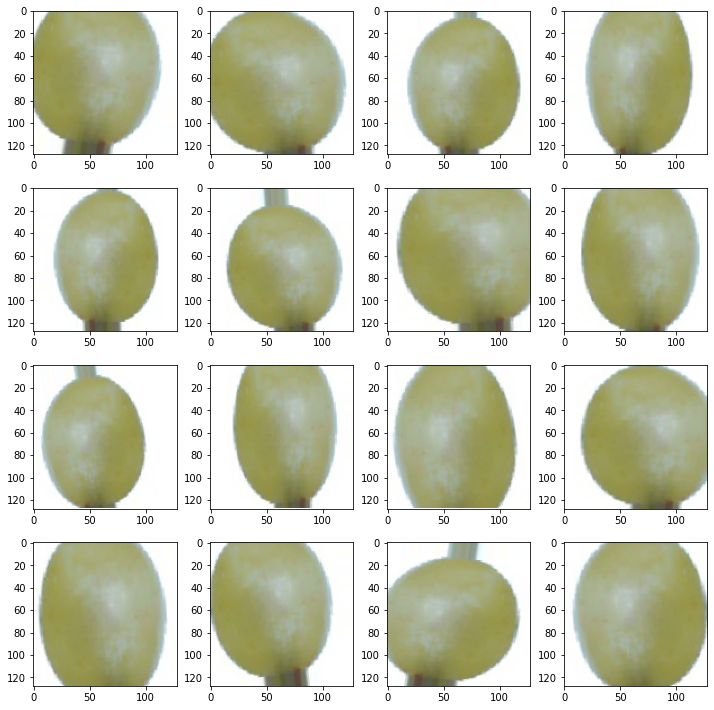

In [ ]:
# sampel datagen example
df_example = df_train.sample(n=1).reset_index(drop=True)
example_gen = train_gen.flow_from_dataframe(
    df_example,
    "../content/drive/My Drive/Cnn_datasets/Natural_images_2/new_images/natural_images/", 
    x_col='filename',
    y_col='categories',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=16
)
# plot example to showcase datageneration
plt.figure(figsize=(10,10))
for i in range(0, 16):
  plt.subplot(4,4,i+1)
  for X_batch, Y_batch in example_gen:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

In [ ]:
# fit and run the model
# assign number of epochs
epochs=15

# fit/train the model
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validate_generator,
    validation_steps=total_validate//18,
    steps_per_epoch=total_train//18,
    callbacks=callback
)

Epoch 1/15
309/309 [==============================] - 1013s 3s/step - loss: 1.4408 - accuracy: 0.5113 - val_loss: 0.8709 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 2/15
309/309 [==============================] - 835s 3s/step - loss: 0.8868 - accuracy: 0.7035 - val_loss: 0.6661 - val_accuracy: 0.8141 - lr: 1.0000e-04
Epoch 3/15
309/309 [==============================] - 875s 3s/step - loss: 0.7494 - accuracy: 0.7426 - val_loss: 0.5296 - val_accuracy: 0.8433 - lr: 1.0000e-04
Epoch 4/15
309/309 [==============================] - 825s 3s/step - loss: 0.6900 - accuracy: 0.7660 - val_loss: 0.4809 - val_accuracy: 0.8523 - lr: 1.0000e-04
Epoch 5/15
309/309 [==============================] - 814s 3s/step - loss: 0.6332 - accuracy: 0.7822 - val_loss: 0.4585 - val_accuracy: 0.8490 - lr: 1.0000e-04
Epoch 6/15
309/309 [==============================] - 859s 3s/step - loss: 0.6011 - accuracy: 0.7970 - val_loss: 0.3535 - val_accuracy: 0.8937 - lr: 1.0000e-04
Epoch 7/15
309/309 [===================

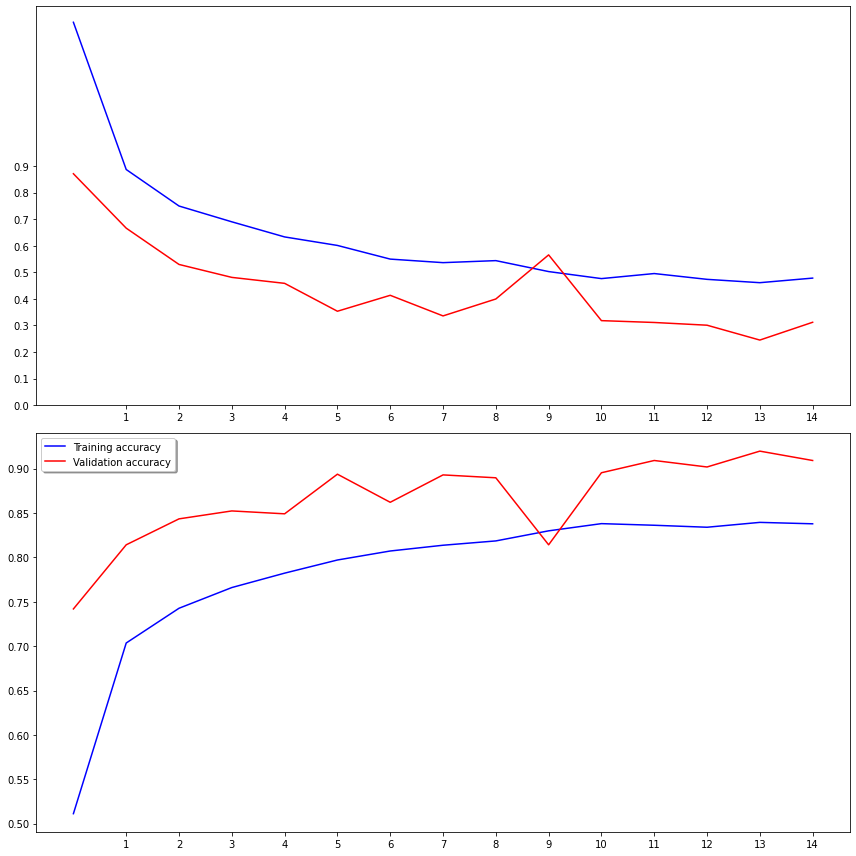

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()